In [2]:
import numpy as np
import scipy as sc
import scipy.integrate as slv
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


## Дискретная модель



Модель задается уравнением

$$
x_{n+1} = rx_n ln(\frac{x_n}{K}) + x_n
$$

Найдем стационарные точки из условия $x_{n+1} = x_n$

$$
x_{n} = rx_n ln(\frac{x_n}{K}) + x_n \\
rx_n ln(\frac{x_n}{K}) = 0 \\
$$

Тривиальное решение:
$$ x_n = 0$$

Второе решение:
$$
ln(\frac{x_n}{K}) = 0 \\
\frac{x_n}{K} = 1 \\
x_n = K
$$
Итак, эта модель имеет две стационарные точки 0 и K, вторая зависит от параметра K.




У этой модели есть ограничение, значение под знаком логорифма должно быть больше 0, поэтому $x_n > 0 $

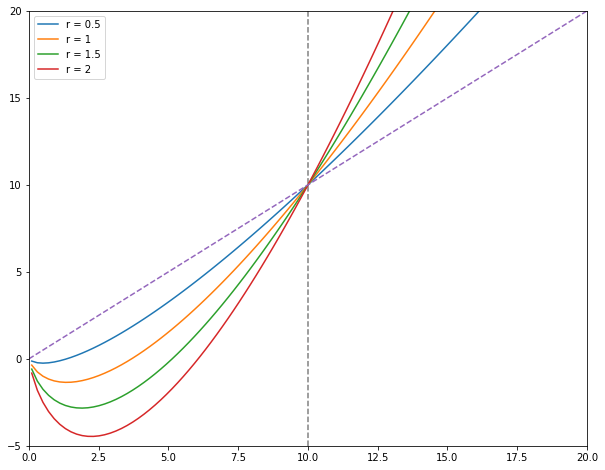

In [36]:
r = 1
K = 10
f_xn = lambda x,r,K: x*r*np.log(x/K)+x

xn = np.linspace(0.1, 20, 100)

plt.figure(figsize=(10, 8))

for r in [0.5, 1, 1.5, 2]:
    plt.plot(xn, f_xn(xn, r, K), label=(f"r = {r}"))
plt.legend()

plt.plot([0, 20], [0, 20], linestyle="--")
plt.xlim(0, 20)
plt.ylim(-5, 20)
plt.vlines(10, -5, 20, color="gray", linestyle="--")

None

Хорошо видно, что есть две точки пересечения графиков с линией $y = x$, это (0; 0) и (10; 10), вторая точка соответствует $x = K$.

Для модели $
x_{n+1} = rx_n ln(\frac{x_n}{K}) + x_n
$ стационарные точки не зависят от значения $r$.




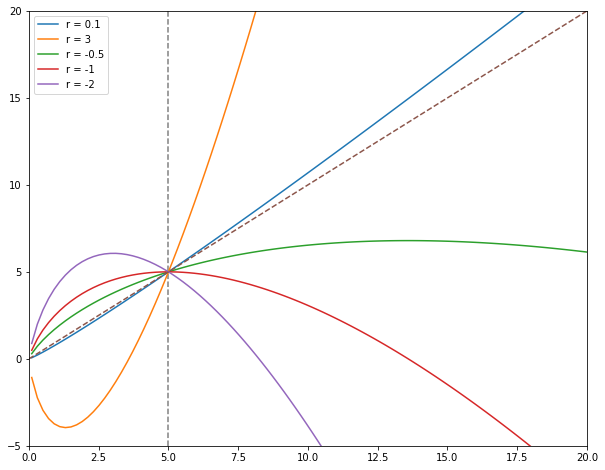

In [43]:
r = 1
K = 5

xn = np.linspace(0.1, 20, 100)

plt.figure(figsize=(10, 8))

for r in [0.1, 3, -0.5, -1, -2]:
    plt.plot(xn, f_xn(xn, r, K), label=(f"r = {r}"))
plt.legend()

plt.plot([0, 20], [0, 20], linestyle="--")
plt.xlim(0, 20)
plt.ylim(-5, 20)
plt.vlines(5, -5, 20, color="gray", linestyle="--")

None

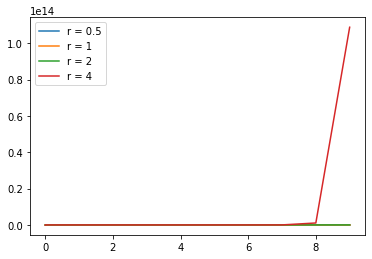

In [53]:
r = 1
x0 = 11
K = 10

for r in [0.5, 1, 2, 4]:
    xn = [x0]
    tt = [0]

    for i in range(10):
        tt.append(i)
        xn.append(f_xn(xn[-1], r, K))

    plt.plot(tt, xn, label=(f"r = {r}"))
plt.legend()
None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


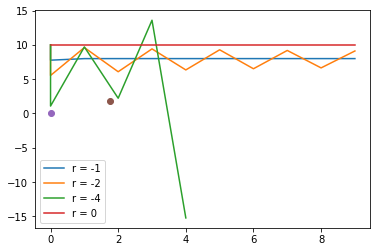

In [48]:
r = -2
x0 = 10
K = 8

for r in [-1, -2, -4, 0]:
    xn = [x0]
    tt = [0]

    for i in range(10):
        tt.append(i)
        xn.append(f_xn(xn[-1], r, K))

    plt.plot(tt, xn, label=(f"r = {r}"))
plt.legend()
None

In [ ]:
plt.figure(figsize=(10, 8))

for r in [0.2, 0.5, 1, 1.5]:
    xn = [x0]
    tt = [0]

    for i in range(10):
        tt.append(i)
        xn.append(f_discrete(xn[-1], r, K))

    plt.plot(tt, xn, label=(f"r = {r}"))
plt.legend()

plt.plot([0, 8], [0, 8], linestyle="--")
plt.show()


## Вспышка численности насекомых

Модель задается уравнением

$$
\frac{dy}{dt} = ry(1 - \frac{y}{K}) - \frac{y^2}{1 + y^2} \\
$$

$K = 15$


Для того, чтобы найти стационарные точки, нужно решить уравнение

$$
ry(1 - \frac{y}{K}) - \frac{y^2}{1+y^2} = 0 \\
$$
У уравнения есть тривиальное решение $y=0$. Другие решения найти аналитически сложно, но можно переписать уравнение в таком виде:

$$
r(1 - \frac{y}{K}) = \frac{y}{1+y^2}
$$

Можно построить графики двух функций $f(y) = r(1-\frac{y}{K})$ и $g(y) = \frac{y}{1+y^2}$, тогда их пересечение будет давать стационарные точки.



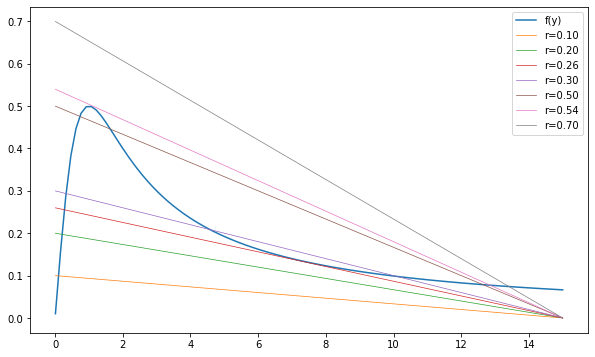

In [59]:
fy = lambda y, r, K: r - r*y/K
gy = lambda y: y/(1+y**2)

K = 15
yy = np.linspace(0.01, 15, 100)

plt.figure(figsize=(10, 6))
plt.plot(yy, gy(yy), label=('f(y)'))
for r in [0.1, 0.2, 0.26,  0.3, 0.5, 0.54, 0.7]:
  plt.plot(yy, fy(yy, r, K), linewidth=0.7, label=('r=%.2f' % r))
plt.legend()
None

В зависимости от значения $r$ может быть 1 стационарная точка (оранжевая и зеленая линии), 2 стационарные точки  при $r \approx 0.26$ (красная линия) и $r \approx 0.54$ (сиреневая линия), 3 стационарные точки (фиолетовая и коричневая) и ни одной стационарной точки.

###Графики $y'(y)$

---



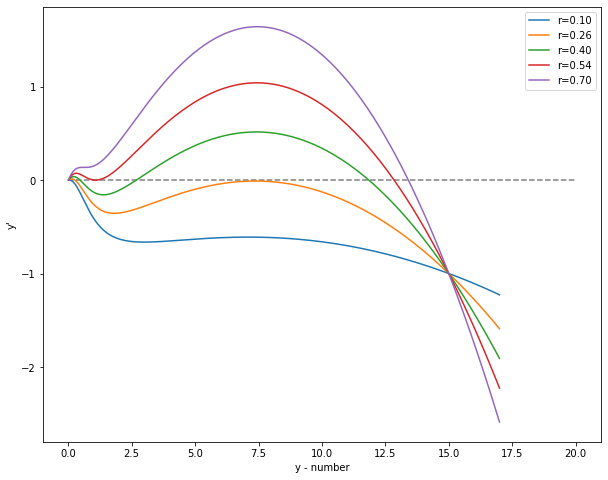

In [60]:
f_model = lambda y, r, K: r*y*(1-y/K) - y**2/(1+y**2)

K = 15
yy = np.linspace(0.01, 17, 200)

plt.figure(figsize=(10, 8))
for r in [0.1, 0.26, 0.4, 0.54, 0.7]:
  plt.plot(yy, f_model(yy, r, K), label=('r=%.2f' % r))
plt.legend()
plt.xlabel('y - number')
plt.ylabel('y\'')
plt.hlines(0, 0, 20, color="grey", linestyles="--")

None

2. Строим фазовое пространство

$$
ry(1-\frac{y}{K}) - \frac{y^2}{1+y^2} = 0 \\
r = \frac{y}{(1+y^2)(1-\frac{y}{K})} \\
r = \frac{Ky}{(1+y^2)(K-y)}
$$

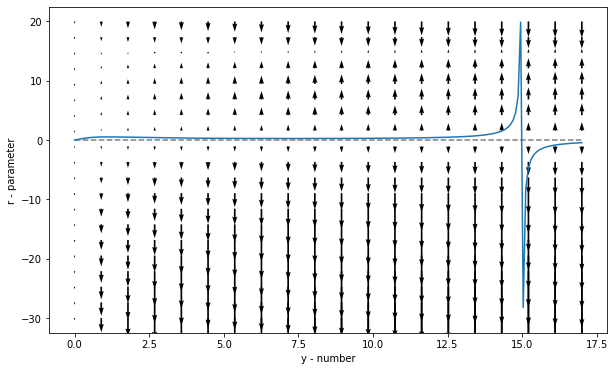

In [61]:
f_model = lambda y, r, K: r*y*(1-y/K) - y**2/(1+y**2)
fr = lambda y, K: K*y/((1+y**2)*(K-y))
f_zero = lambda y, r: y*0
fu2 = lambda y, r, K: np.sign(f_model(y, r, K))*np.abs(f_model(y, r, K))**0.4


yy = np.linspace(0, 17, 200)

plt.figure(figsize=(10, 6))

plt.plot(yy, fr(yy, K))
#plt.legend()
plt.xlabel('y - number')
plt.ylabel('r - parameter')
plt.hlines(0, 0, 17, color="grey", linestyles="--")
#plt.ylim(-8, 15)

len_arr = 20
xx = np.linspace(-30, 20, len_arr)
yy = np.linspace(0, 17, len_arr)

Xm, Ym = np.meshgrid(xx, yy)
u = np.zeros_like(Xm)
v = fu2(Xm, Ym, K)

plt.quiver(Ym, Xm, u, v, scale_units='xy', angles='xy')
None

###Строим кинетики $y(t)$

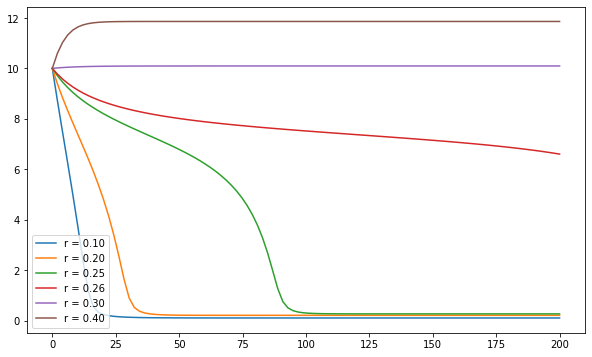

In [48]:
#ft_model = lambda y, tt, r, K: r*y*(1-y/K) - y**2/(1+y**2)


y0 = 10
tt = np.linspace(0, 200, 100)

plt.figure(figsize=(10, 6))
K = 15

for r in [0.1, 0.2, 0.25, 0.26, 0.3, 0.4]:
  ft_model = lambda y, tt: f_model(y, r, K)

  aa = slv.odeint(ft_model, y0, tt)
  plt.plot(tt, aa, label=("r = %.2f" % r))
plt.legend()


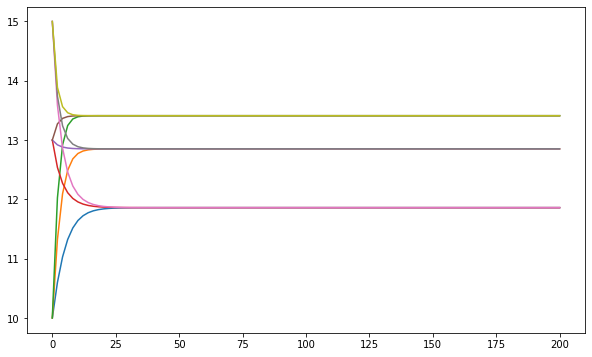

In [58]:
y0 = 10
tt = np.linspace(0, 200, 100)

plt.figure(figsize=(10, 6))
K = 15

for y0 in [10, 13, 15]:
  for r in [ 0.4, 0.54, 0.7]:
    ft_model = lambda y, tt: f_model(y, r, K)

    aa = slv.odeint(ft_model, y0, tt)
    plt.plot(tt, aa, label=(f"r = {r}, y0 = {y0}"))
#plt.legend()
None

### 3d-график

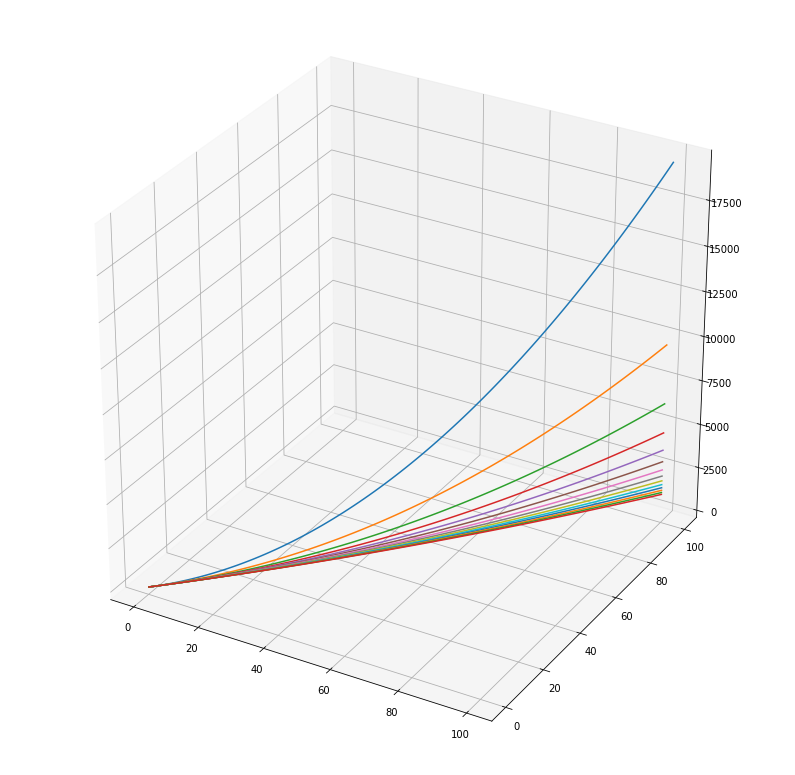

In [71]:
x = np.linspace(0.1, 100, 100)
y = x

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

r = -2
for K in range(1, 15):
  z = f_model(x, r, K)
  ax.plot(x, y, z, label='parametric curve')
None